# Import

In [7]:
import sys
sys.path.append("..")

from src.data import CrossSimilarityDataset
from src.utils import plot_cross_similarity
from src.transforms import RandomJumps
from src.asap import load_annotations, ASAPWrapper

import os

import numpy as np
from torch.utils.data import DataLoader
from torchvision.transforms.v2 import Resize
import matplotlib.pyplot as plt
%matplotlib inline

# Load dataset

In [4]:
# Path to the clonned ASAP repository

asap_dir = "../../asap-dataset"

In [5]:
asap_wrapper = ASAPWrapper(asap_dir, val_ratio=0.2, random_seed=42)

In [6]:
print(f'Number of performances in train: {len(asap_wrapper.train_paths)}')
print(f'Number of performances in val: {len(asap_wrapper.val_paths)}')

Number of performances in train: 866
Number of performances in val: 170


In [9]:
img_size = 1024
fs = 40 # Sampling frequency
transform = Resize((img_size, img_size))
jumps_transform = RandomJumps(fs, min_num_jumps=0, max_num_jumps=3, max_silence_s=8.)

train_dataset = CrossSimilarityDataset(asap_wrapper.train_paths,
                                       fs,
                                       transform,
                                       structural_transform=jumps_transform,
                                       inference_only=False)

In [10]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

/home/dmgvrlv/miniconda3/envs/dcnn/lib/python3.10/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
/home/dmgvrlv/miniconda3/envs/dcnn/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(anti

torch.Size([8, 1, 1024, 1024])
torch.Size([8, 6, 2])


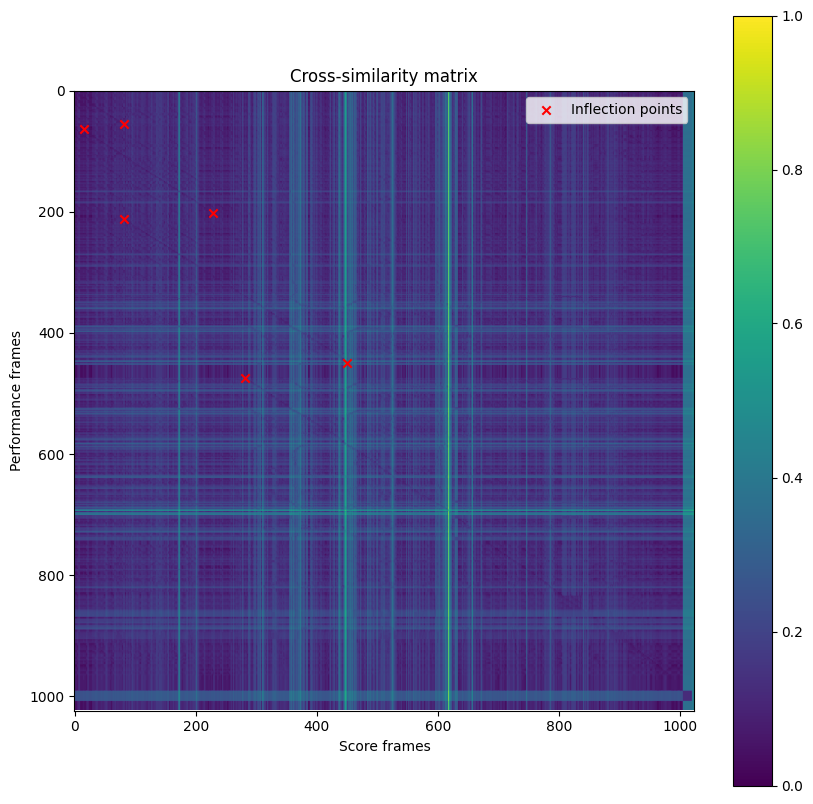

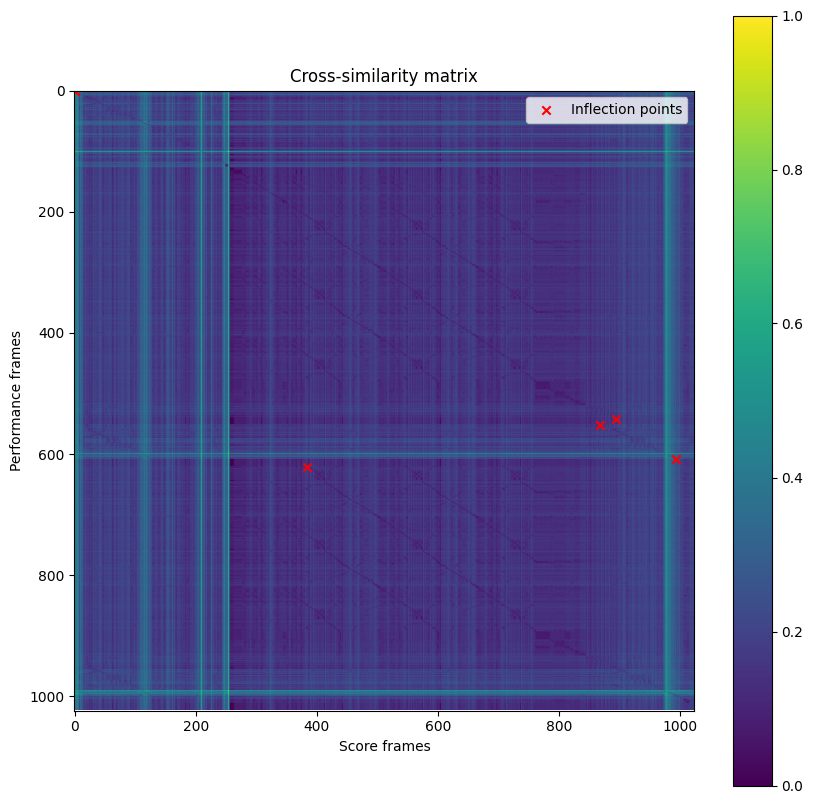

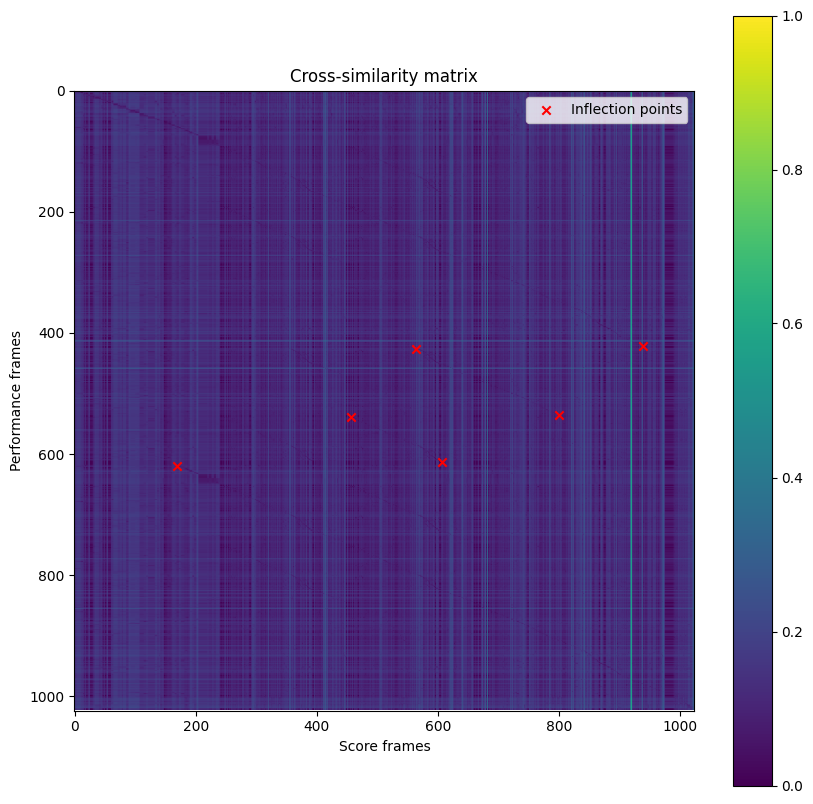

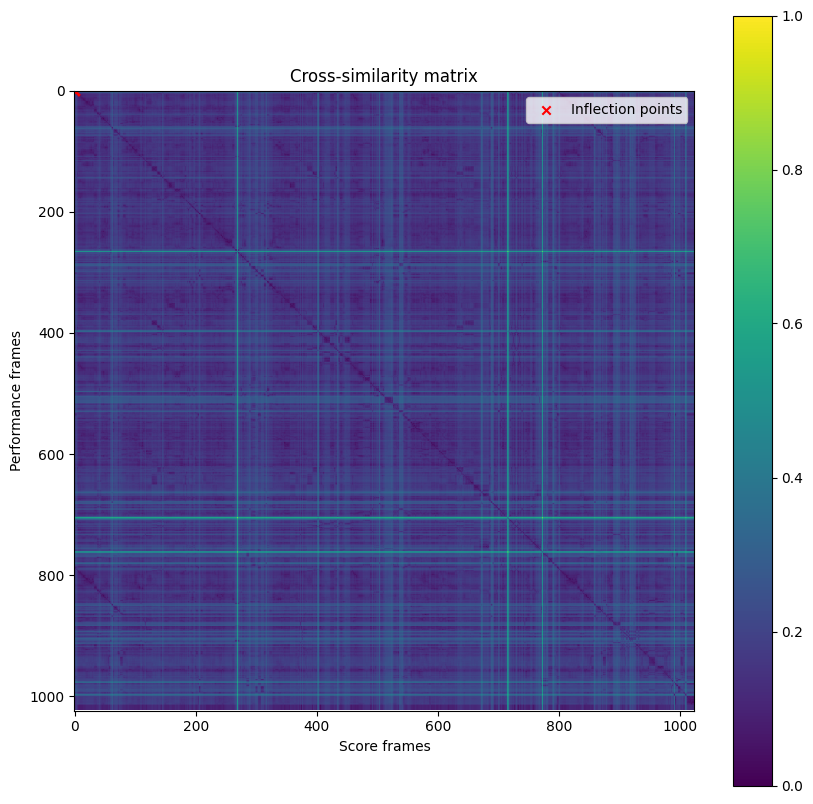

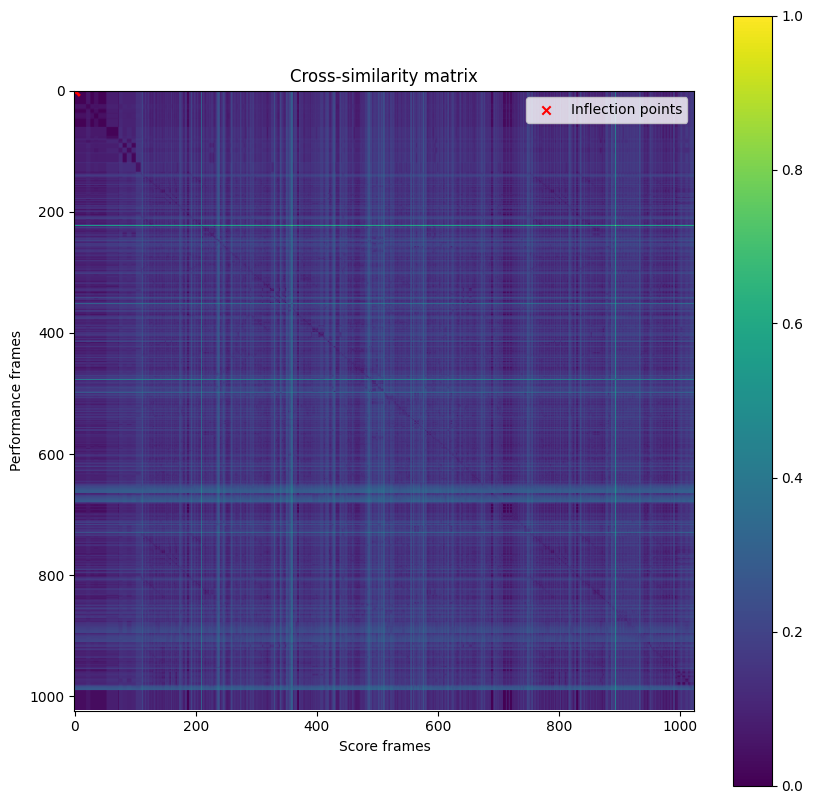

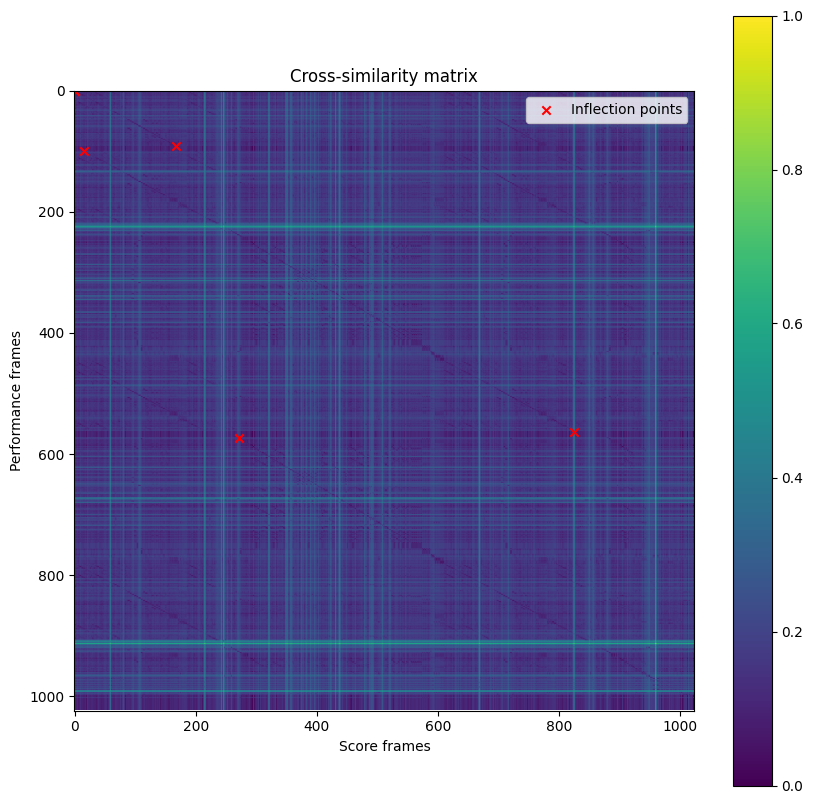

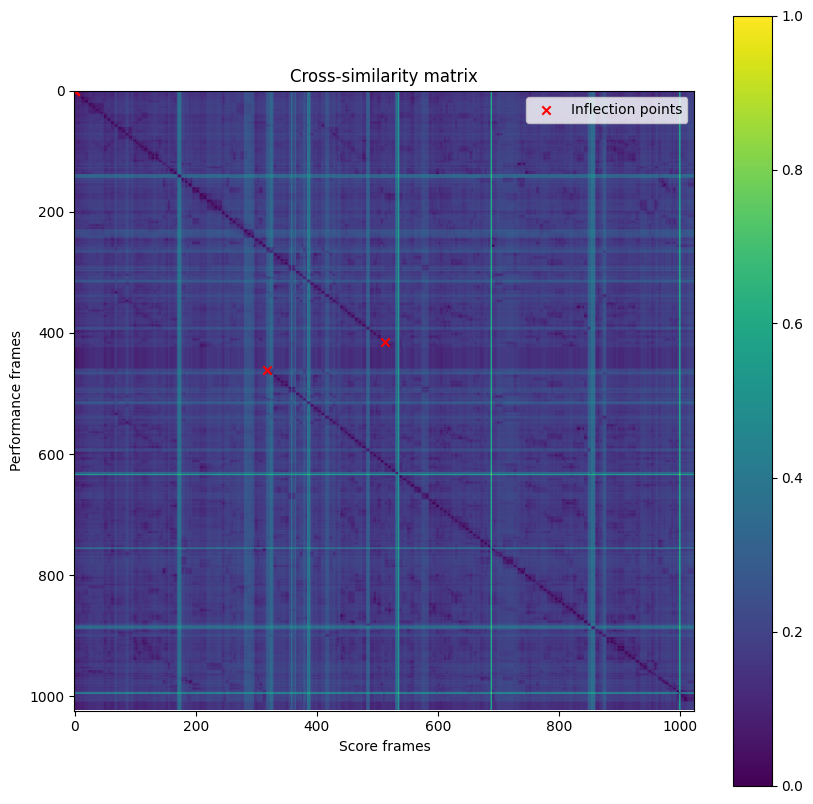

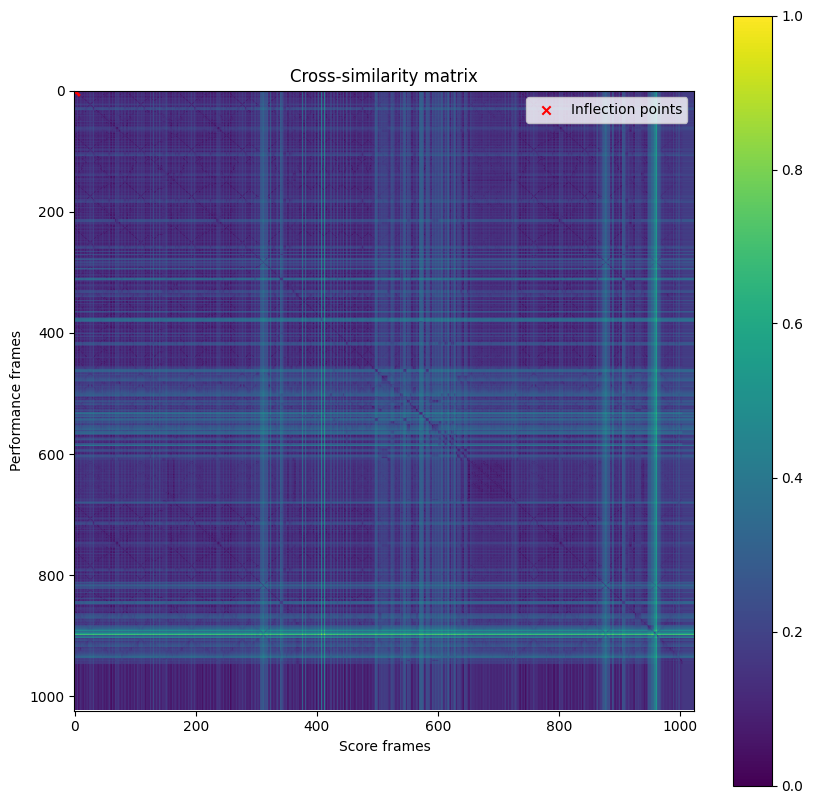

In [11]:
for batch in train_loader:
    x = batch['image']
    target = batch['target']
    for i in range(len(x)):
        plot_cross_similarity(x[i],
                              beat_alignment=None,
                              inflection_points=target[i])
    print(x.shape)
    print(target.shape)
    break

# Model

In [12]:
import torch
import torch.nn as nn


class DCNN(nn.Module):
    """Dilated CNN."""

    def __init__(self):
        """Initializes an object of DCNN."""
        super().__init__()
        pass

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Predicts inflection points.

        Args:
            x: A batch of cross-similarity matrices of shape (B, 1, H, W),
              where `B` is the batch size, `H` and `W` are the height and
              width, respectively.
        
        Returns:
            A batch of inflection points of shape (B, max_num_jumps, 2).
        """
        pass